<a href="https://colab.research.google.com/github/SuheirJammal/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predition of Product Sales

  - Author: Suheir Jammal


## Project Overview

## Load and Inspect Data

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required packages
import pandas as pd

# Save the filepath and load the data as "df_sales"
fpath = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_sales = pd.read_csv(fpath)

In [3]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Display the first 5 rows
df_sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# Display the last 5 rows
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

- Check Data Types and Convert (if required)

In [6]:
# Inspect the Object column's value counts
cat_cols = df_sales.select_dtypes('object').columns

for cat in cat_cols:
  print(df_sales[cat].value_counts())
  print("\n")

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: cou

- Rename Columns
(that have Confusing/Abbreviated Column Names)

In [7]:
#change the column's name Item_MRP to Item_Max_Retail_Price
df_sales= df_sales.rename(columns={'Item_MRP': 'Item_Max_Retail_Price'})

#check the head to see the changes
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_Max_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


-  Duplicate Rows

In [8]:
#Check the number of duplicated rows to see if there are duplicates
df_sales.duplicated().sum()

np.int64(0)

- (Unique Identifiers)
Find and Drop Columns if they have Unique Values for Every Row. Except for the index


In [9]:
#Check the number of unique values of each column
df_sales.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_Max_Retail_Price,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


- Identify Missing Values

In [10]:
# Get the number of null values for all columns
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_Max_Retail_Price,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [11]:
# Check the datatype of Item_Weight column
df_sales['Item_Weight'].dtype

dtype('float64')

In [12]:
# fill null values in the item_Weight column with a numeric value
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

In [13]:
# Check the datatype of Outlet_Size column
df_sales['Outlet_Size'].dtype

dtype('O')

In [14]:
# fill null values in the Outlet_Size column with 'MISSING', since it's an object
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')

In [15]:
#Confirm that the are no missing values
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_Max_Retail_Price,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


- Inconsistent Values


In [16]:
# checking the inconsistencies by inspecting the value counts for string columns
cat_cols = df_sales.select_dtypes('object').columns

for cat in cat_cols:
  print(df_sales[cat].value_counts())
  print("\n")


Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: cou

In [17]:
# change low fat, LF to Low Fat and reg to Regular
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [18]:
# change reg to Regular
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace(['reg'], 'Regular')

In [19]:
# cofirm the consistancy
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


- summary statistics

In [20]:
#Obtain the summary statistics of numerical columns
num_cols = df_sales.select_dtypes('number').columns

for col in num_cols:
  print(df_sales[col].describe().loc[['min','max','mean']])
  print('\n')

min     -1.000000
max     21.350000
mean    10.478936
Name: Item_Weight, dtype: float64


min     0.000000
max     0.328391
mean    0.066132
Name: Item_Visibility, dtype: float64


min      31.290000
max     266.888400
mean    140.992782
Name: Item_Max_Retail_Price, dtype: float64


min     1985.000000
max     2009.000000
mean    1997.831867
Name: Outlet_Establishment_Year, dtype: float64


min        33.290000
max     13086.964800
mean     2181.288914
Name: Item_Outlet_Sales, dtype: float64




## Exploratory Data Analysis

We are going to explore the Item type/ Item Weight/Item Visibiltity

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [22]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_Max_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


-   Expore Item_Weight Feature (numeric feature)
    - Numeric Feature
    - fill back null values intead of -1  in the item_Weight, becuse -1 will affect our visualization




In [23]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].replace(-1, np.nan)

In [24]:
df_sales['Item_Weight'].describe()

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
25%,8.773750
50%,12.600000
75%,16.850000
max,21.350000


In [25]:
def explore_numeric(df, x):
  fig, ax = plt.subplots(nrows = 2, sharex=True)
  sns.histplot(data = df_sales, x = feature_name, ax=ax[0])
  sns.boxplot(data = df_sales, x = feature_name, ax=ax[1])
  ax[0].set_title(f"Column: {x}")
  fig.tight_layout()
  return fig, ax

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

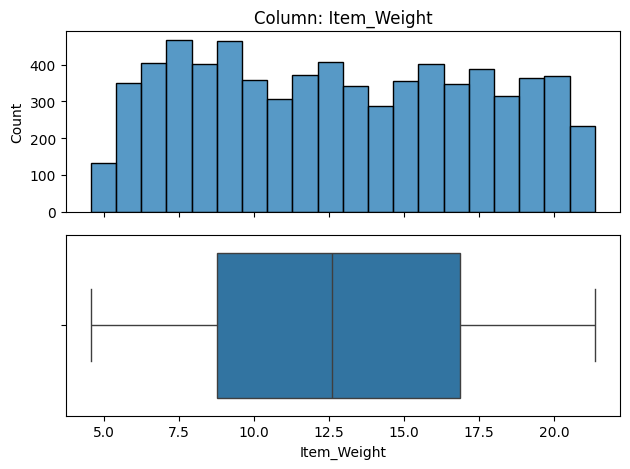

In [26]:
feature_name = 'Item_Weight'
explore_numeric(df_sales, feature_name)

-   Expore Outlet_Size
    - Feature (categorical feature)


In [27]:
outlet_size_classes = df_sales['Outlet_Size'].value_counts()
outlet_size_classes

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [28]:
def explore_cat(df, x, order=None):
  fig, ax = plt.subplots()
  sns.countplot(data= df, x = x, order=order)
  ax.set_title(f"Column: {x}")
  fig.tight_layout()
  return fig, ax

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

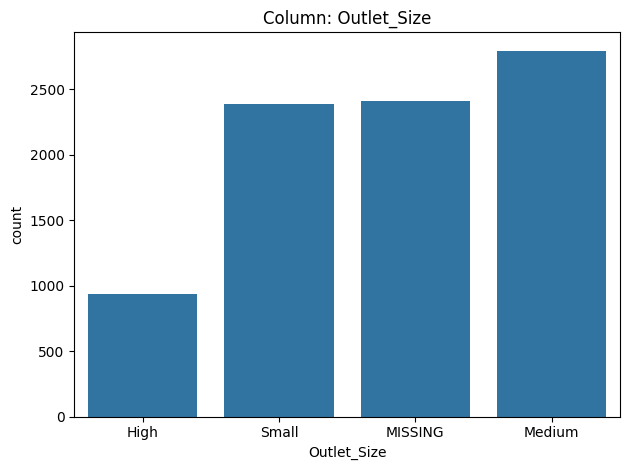

In [29]:
feature_name = 'Outlet_Size'
order = outlet_size_classes.index[::-1]
explore_cat(df_sales, feature_name, order=order)


- Explore the relationship between numeric features
    - Heatmap

In [30]:
numeric_cols = df_sales.select_dtypes('number')
corr = numeric_cols.corr().round(2)
corr

,Item_Weight,Item_Visibility,Item_Max_Retail_Price,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_Max_Retail_Price,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<Axes: >

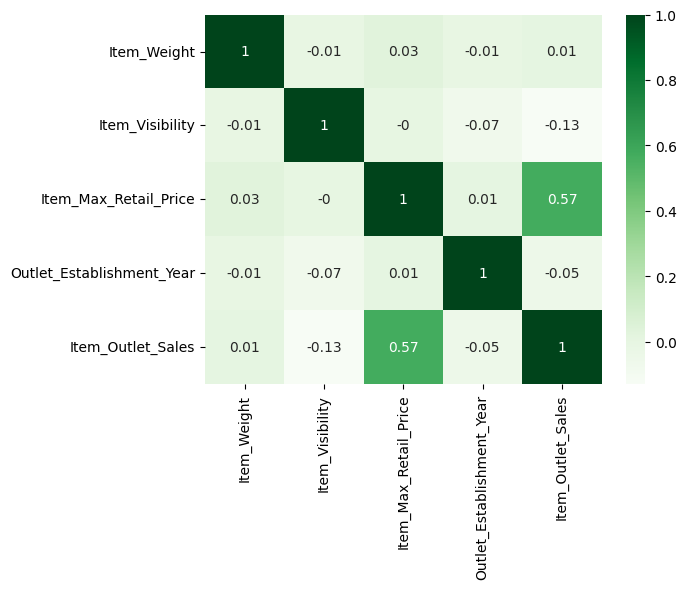

In [31]:
sns.heatmap(corr, annot=True, cmap='Greens')

We can see from the heatmap that the relationship between Item_Max_Retail_Price and Item_Outlet_Sales is **positive moderate relationship 0.57** (between 0.5 and 0.7 )

<Axes: xlabel='Item_Max_Retail_Price', ylabel='Item_Outlet_Sales'>

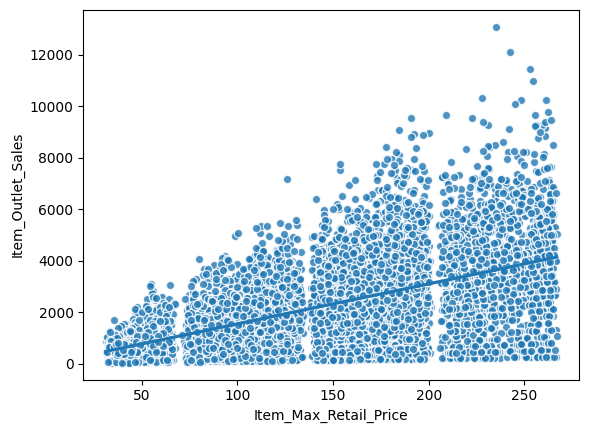

In [33]:
sns.regplot(data=df_sales, x= 'Item_Max_Retail_Price', y= 'Item_Outlet_Sales', scatter_kws={'edgecolor':'white'})

## Feature Inspection